# Plotting of Model

In [2]:
# Model
import numpy as np
import tellurium as te
# Plotting
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
# Dataframe
import pandas as pd
import dataset_long as dsl

## Steady State

J_P_aging: 62.846604893192854 
J_P_aging*2**10: 64354.92341062948
J_P_birth: 289.36745301605185
J_P_death: 226.520848122859 
J_P_death+age: 289.36745301605185
J_R_aging+J_R_death: 64354.923389285905 
J_R_aging: 64308.22708523137
J_E_death: 64308.22710462046 
LDH_conc: 6057.41649087039


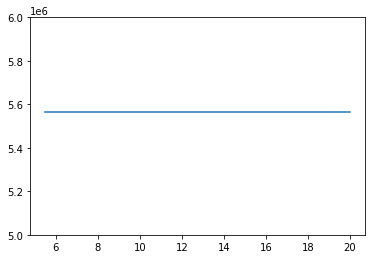

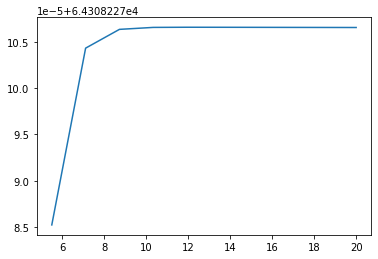

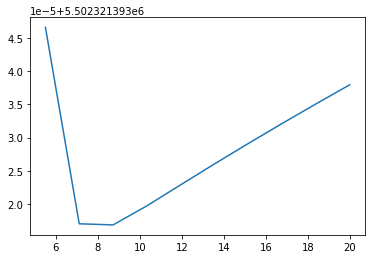

In [3]:
#Steady State

OIE = te.loada('OIE_model.ant')

OIE.k_E_infect = 0
OIE.BH_max = 0

print(f'J_P_aging: {OIE.J_P_aging } \nJ_P_aging*2**10: {OIE.J_P_aging*2**10 }\nJ_P_birth: {OIE.J_P_birth }\nJ_P_death: {OIE.J_P_death} \nJ_P_death+age: {OIE.J_P_death+ OIE.J_P_aging}')

print (f'J_R_aging+J_R_death: {OIE.J_R_aging + OIE.J_R_death} \nJ_R_aging: {OIE.J_R_aging }')

print (f'J_E_death: {OIE.J_E_death } \nLDH_conc: {OIE.LDH_conc_E }' )

result = OIE.simulate(5.5,20,10,['time','E','J_R_aging'])
fig,ax = plt.subplots()
ax.plot(result['time'], result['E'])
ax.set_ylim(5000000,6000000)
plt.show()

fig,ax = plt.subplots()
ax.plot(result['time'], result['J_R_aging'])
plt.show()
fig,ax = plt.subplots()
ax.plot(result['time'], result['E']-result['J_R_aging'])
plt.show()


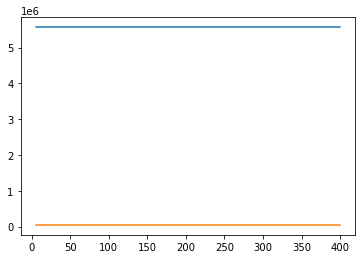

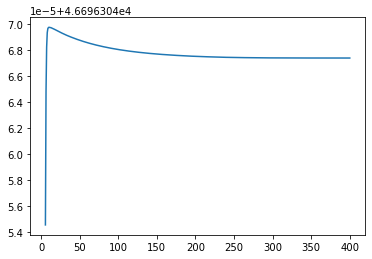

       time,           E,       R,       P
 [[     5.5, 5.56663e+06, 46696.3, 453.042],
  [ 6.29058, 5.56663e+06, 46696.3, 453.042],
  [ 7.08116, 5.56663e+06, 46696.3, 453.042],
  [ 7.87174, 5.56663e+06, 46696.3, 453.042],
  [ 8.66232, 5.56663e+06, 46696.3, 453.042],
  [ 9.45291, 5.56663e+06, 46696.3, 453.042],
  [ 10.2435, 5.56663e+06, 46696.3, 453.042],
  [ 11.0341, 5.56663e+06, 46696.3, 453.042],
  [ 11.8246, 5.56663e+06, 46696.3, 453.042],
  [ 12.6152, 5.56663e+06, 46696.3, 453.042],
  [ 13.4058, 5.56663e+06, 46696.3, 453.042],
  [ 14.1964, 5.56663e+06, 46696.3, 453.042],
  [  14.987, 5.56663e+06, 46696.3, 453.042],
  [ 15.7776, 5.56663e+06, 46696.3, 453.042],
  [ 16.5681, 5.56663e+06, 46696.3, 453.042],
  [ 17.3587, 5.56663e+06, 46696.3, 453.042],
  [ 18.1493, 5.56663e+06, 46696.3, 453.042],
  [ 18.9399, 5.56663e+06, 46696.3, 453.042],
  [ 19.7305, 5.56663e+06, 46696.3, 453.042],
  [  20.521, 5.56663e+06, 46696.3, 453.042],
  [ 21.3116, 5.56663e+06, 46696.3, 453.042],
  [ 22.1022,

In [4]:
OIE = te.loada('OIE_model_new.ant')

OIE.events_medication_on = False
OIE.BH_max = 0
OIE.switch_oiE = 0
OIE.switch_fHb = 0
OIE.k_E_infect = 0
OIE.k_R_infect = 0


vars = ['E', 'R', 'P']



result = OIE.simulate(5.5,400,500,['time']+ vars)
fig,ax = plt.subplots()
ax.plot(result['time'], result[vars[0]])
ax.plot(result['time'], result[vars[1]])
plt.show()

fig,ax = plt.subplots()
ax.plot(result['time'], result[vars[1]])
plt.show()

result

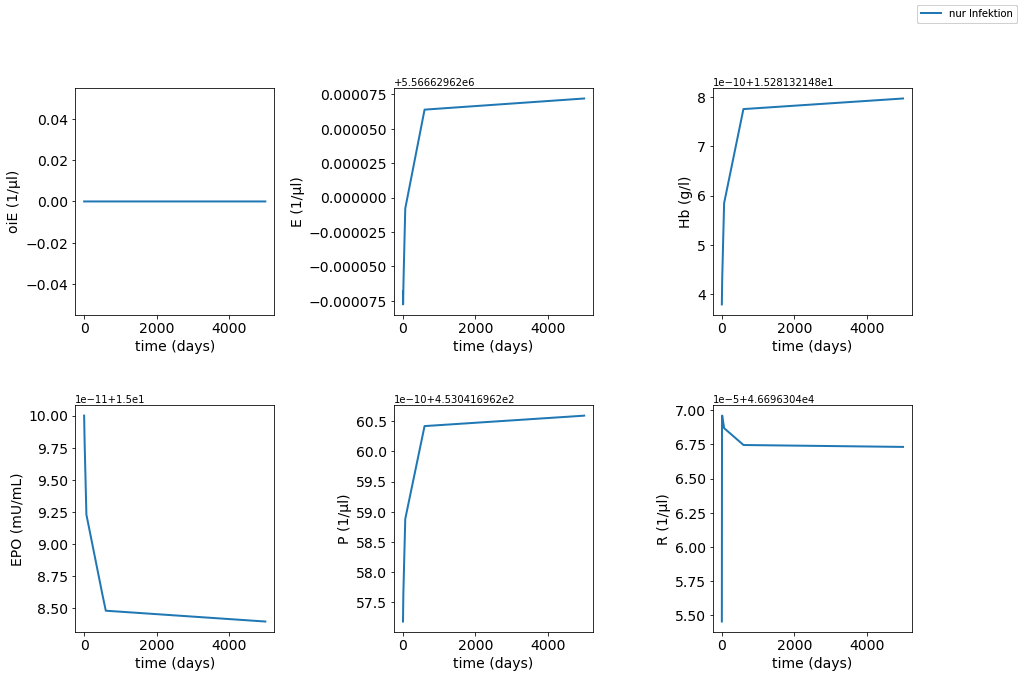

In [5]:
# Laden des Modells
OIE = te.loada('OIE_model.ant')
time_max = 5000
step_size = 2000
size_of_font = 14

variables = ['oiE', 'E', 'Hb','EPO','P', 'R']

# Erstellen des Subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.4, wspace= 0.6)

# Durchläufe für jede Variable
for i, var in enumerate(variables):
    OIE.resetToOrigin()

    OIE.events_medication_on = False
    OIE.BH_max = 0
    OIE.switch_oiE = 0
    OIE.switch_fHb = 0
    OIE.k_E_infect = 0
    OIE.k_R_infect = 0


    result1 = OIE.simulate(0, time_max, step_size, ['time', var])

    # Hinzufügen des Plots zum Subplot
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    ax.plot(result1['time'], result1[var], label='nur Infektion', color = 'tab:blue',  linewidth=2)
    ax.tick_params(labelsize=size_of_font) # Größe Achseneinteilungen (zahlen)
    ax.set_xlabel('time (days)', fontsize= size_of_font)

    if var == 'Hb': ax.set_ylabel(var+ ' (g/l)', fontsize= size_of_font)   
    elif var == 'EPO': ax.set_ylabel(var+' (mU/mL)', fontsize= size_of_font)   
    else: ax.set_ylabel(var+ ' (1/µl)', fontsize= size_of_font)
    #ax.set_title(var + '-Simulationen')
    ax.legend(fontsize = size_of_font, loc='upper right') # Größe legende

    handles, labels = ax.get_legend_handles_labels()  # Legend Box outsides Subplots
    fig.legend(handles, labels, loc='upper right')
    
    ax.get_legend().remove()  # entfernt Legende aus einzelnen Plots
# Anzeigen der Plots
plt.show()



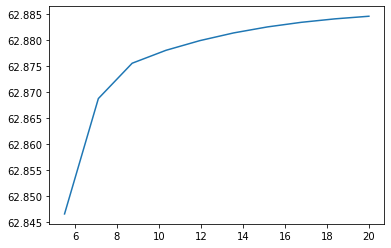

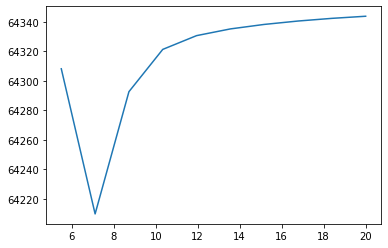

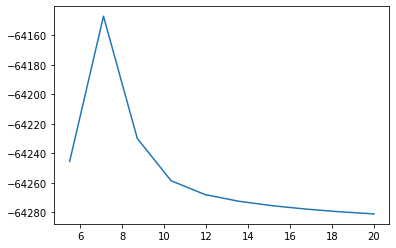

In [6]:
OIE = te.loada('OIE_model.ant')
OIE.BH_max = 5

result = OIE.simulate(5.5,20,10,['time','J_P_aging','J_R_aging'])
fig,ax = plt.subplots()
ax.plot(result['time'], result['J_P_aging'])
plt.show()

fig,ax = plt.subplots()
ax.plot(result['time'], result['J_R_aging'])
plt.show()
fig,ax = plt.subplots()
ax.plot(result['time'], result['J_P_aging']-result['J_R_aging'])
plt.show()



### Parasite Oscillation without medication

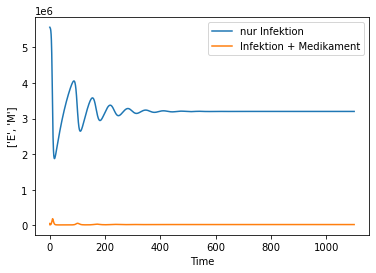

In [7]:
# Laden des Modells
OIE = te.loada('OIE_model.ant')
time_max = 1100
step_size = time_max *4 +1
variables = ['E','M']

#without medication
OIE.events_medication_on = False
#simulate
result = OIE.simulate(0, time_max, step_size , ['time']+ variables)
# Erstellen des Plots
fig, ax = plt.subplots()
# Hinzufügen der Ergebnisse für jeden Durchlauf zum Plot
ax.plot(result['time'], result[variables[0]], label='nur Infektion')
ax.plot(result['time'], result[variables[1]]+10000, label='Infektion + Medikament')
# Beschriftung der Achsen und Titel des Plots
ax.set_xlabel('Time')
ax.set_ylabel(variables)

# Hinzufügen einer Legende
ax.legend()

# Anzeigen des Plots
plt.show()


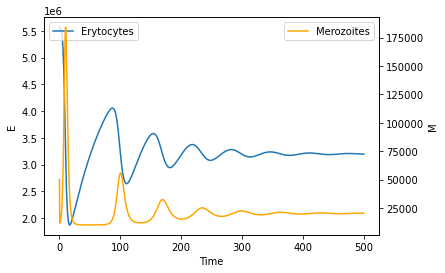

In [8]:
# Laden des Modells
OIE = te.loada('OIE_model.ant')
time_max = 500
step_size = 1000 + 1
variables = ['E', 'M']

# without medication
OIE.events_medication_on = False
result = OIE.simulate(0, time_max, step_size, ['time'] + variables)

# Erstellen des Plots
fig, ax1 = plt.subplots()

# Hinzufügen der Ergebnisse für jeden Durchlauf zur linken y-Achse
ax1.plot(result['time'], result[variables[0]], label='Erytocytes')
ax1.set_xlabel('Time')
ax1.set_ylabel(variables[0])

# Erstellen einer zweiten y-Achse, Hinzufügen der Ergebnisse für 'M' zur rechten y-Achse
ax2 = ax1.twinx()
ax2.plot(result['time'], result[variables[1]] + 10000, label='Merozoites', color='orange')
ax2.set_ylabel(variables[1])

# Hinzufügen einer Legende für beide Achsen
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Anzeigen des Plots
plt.show()

# Lodka-Volterra like: Räuber(M)-Beute(E) Schema, wenn viele E, M steigt, wenn alle E runter, M sinkt -> geht langsam in SS

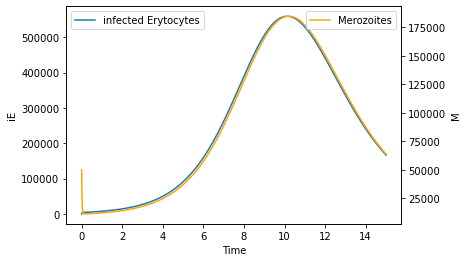

In [9]:
# Laden des Modells
OIE = te.loada('OIE_model.ant')
time_max = 15
step_size = 1000 + 1
variables = ['iE', 'M']

# without medication
OIE.events_medication_on = False
result = OIE.simulate(0, time_max, step_size, ['time'] + variables)

# Erstellen des Plots
fig, ax1 = plt.subplots()

# Hinzufügen der Ergebnisse für jeden Durchlauf zur linken y-Achse
ax1.plot(result['time'], result[variables[0]], label='infected Erytocytes')
ax1.set_xlabel('Time')
ax1.set_ylabel(variables[0])

# Erstellen einer zweiten y-Achse, Hinzufügen der Ergebnisse für 'M' zur rechten y-Achse
ax2 = ax1.twinx()
ax2.plot(result['time'], result[variables[1]] + 10000, label='Merozoites', color='orange')
ax2.set_ylabel(variables[1])

# Hinzufügen einer Legende für beide Achsen
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Anzeigen des Plots
plt.show()

#  Merozoites folgen wenig versetzt infizierten Erys, (iE folgen nicht nur M, durch abhängigkeit von Erys) -> iE werden ohne unterbrechung zu M

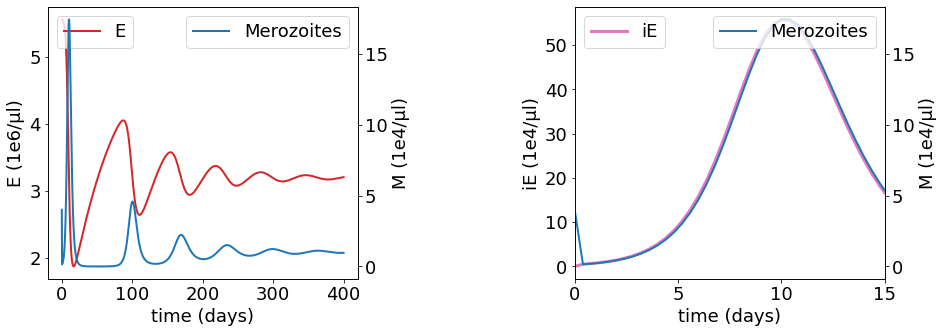

In [10]:
# Laden des Modells
OIE = te.loada('OIE_model.ant')

#Simulation
time_max_1 = 400
step_size_1 = 1000 + 1
size_of_font = 18

variables = ['E', 'iE', 'M']
OIE.events_medication_on = False
result = OIE.simulate(0, time_max_1, step_size_1, ['time'] + variables)

# Erstellen der Subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(wspace= 0.7)

# Erster Plot
ax1.plot(result['time'], result[variables[0]]/1000000, label='E', color= 'tab:red',  linewidth=2)
ax1.tick_params(labelsize=size_of_font) # Größe Achseneinteilungen (zahlen)
ax1.set_xlabel('time (days)',fontsize = size_of_font )
ax1.set_ylabel(variables[0]+' (1e6/µl)', fontsize = size_of_font )
#ax1.set_ylim(0, 5e6)
ax1.legend(fontsize = size_of_font, loc='upper left')

ax12 = ax1.twinx()
ax12.plot(result['time'], result[variables[-1]]/10000, label='Merozoites', color='tab:blue',  linewidth=2)
ax12.tick_params(labelsize=size_of_font) # Größe Achseneinteilungen (zahlen)
ax12.set_ylabel(variables[-1]+' (1e4/µl)', fontsize=size_of_font)
ax12.legend(loc='upper right',fontsize=size_of_font)

# Zweiter Plot
ax2.plot(result['time'], result[variables[1]]/10000, label='iE',color= 'tab:pink',  linewidth=3)
ax2.tick_params(labelsize=size_of_font) # Größe Achseneinteilungen (zahlen)
ax2.set_xlabel('time (days)', fontsize = size_of_font )
ax2.set_ylabel(variables[1]+' (1e4/µl)', fontsize = size_of_font )
ax2.set_xlim(0,15)
ax2.legend(fontsize = size_of_font, loc='upper left')

ax22 = ax2.twinx()
ax22.plot(result['time'], result[variables[-1]]/10000, label='Merozoites', color='tab:blue',  linewidth=2)
ax22.tick_params(labelsize=size_of_font) # Größe Achseneinteilungen (zahlen)
ax22.set_ylabel(variables[-1] + ' (1e4/µl)', fontsize=size_of_font)
ax22.legend(loc='upper right',fontsize=size_of_font)

# Anzeigen der Figure
plt.show()

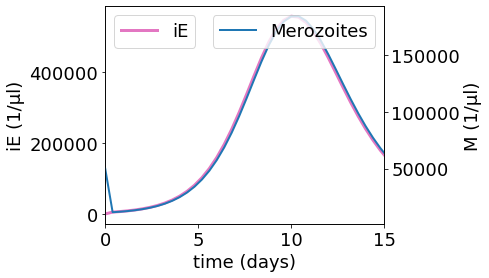

In [11]:
# Laden des Modells
OIE = te.loada('OIE_model.ant')

#Simulation
time_max_1 = 400
step_size_1 = 1000 + 1
size_of_font = 18

variables = ['E', 'iE', 'M']
OIE.events_medication_on = False
result = OIE.simulate(0, time_max_1, step_size_1, ['time'] + variables)

# Erstellen der Subplots
fig, ax2 = plt.subplots(figsize=(5,4))
fig.subplots_adjust(wspace= 1)

# Zweiter Plot
ax2.plot(result['time'], result[variables[1]], label='iE',color= 'tab:pink',  linewidth=3)
ax2.tick_params(labelsize=size_of_font) # Größe Achseneinteilungen (zahlen)
ax2.set_xlabel('time (days)', fontsize = size_of_font )
ax2.set_ylabel(variables[1]+' (1/µl)', fontsize = size_of_font )
ax2.set_xlim(0,15)
ax2.legend(fontsize = size_of_font, loc='upper left')

ax22 = ax2.twinx()
ax22.plot(result['time'], result[variables[-1]] + 10000, label='Merozoites', color='tab:blue',  linewidth=2)
ax22.tick_params(labelsize=size_of_font) # Größe Achseneinteilungen (zahlen)
ax22.set_ylabel(variables[-1] + ' (1/µl)', fontsize=size_of_font)
ax22.legend(loc='upper right',fontsize=size_of_font)

# Anzeigen der Figure
plt.show()

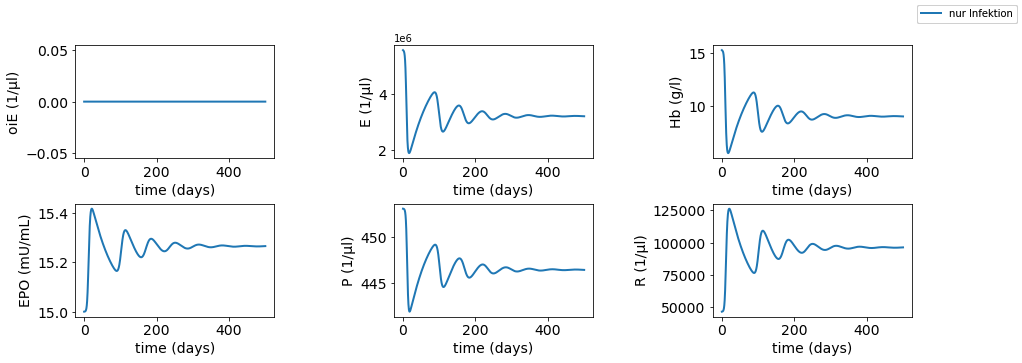

In [12]:
#Überblick Einfluss Parasite

# Laden des Modells
OIE = te.loada('OIE_model.ant')
time_max = 500
step_size = time_max * 4 + 1
size_of_font = 14

variables = ['oiE', 'E', 'Hb', 'EPO','P', 'R']

# Erstellen des Subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 5))
fig.subplots_adjust(hspace=0.4, wspace= 0.6)

# Durchläufe für jede Variable
for i, var in enumerate(variables):
    OIE.resetToOrigin()
    OIE.events_medication_on = False
    result1 = OIE.simulate(0, time_max, step_size, ['time', var])

    # Hinzufügen des Plots zum Subplot
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    ax.plot(result1['time'], result1[var], label='nur Infektion', color = 'tab:blue',  linewidth=2)
    ax.tick_params(labelsize=size_of_font) # Größe Achseneinteilungen (zahlen)
    ax.set_xlabel('time (days)', fontsize= size_of_font)

    if var == 'Hb': ax.set_ylabel(var+ ' (g/l)', fontsize= size_of_font)   
    elif var == 'EPO': ax.set_ylabel(var+' (mU/mL)', fontsize= size_of_font)   
    else: ax.set_ylabel(var+ ' (1/µl)', fontsize= size_of_font)
    #ax.set_title(var + '-Simulationen')
    ax.legend(fontsize = size_of_font, loc='upper right') # Größe legende

    handles, labels = ax.get_legend_handles_labels()  # Legend Box outsides Subplots
    fig.legend(handles, labels, loc='upper right')
    
    ax.get_legend().remove()  # entfernt Legende aus einzelnen Plots
# Anzeigen der Plots
plt.show()

#warum R hat andere Kurve als P und E, warum EPO und R gleiche Kurve? waum keine symmetrische kurven? wegen Dämpfung?

## Influx medication on parasite (M, iE)

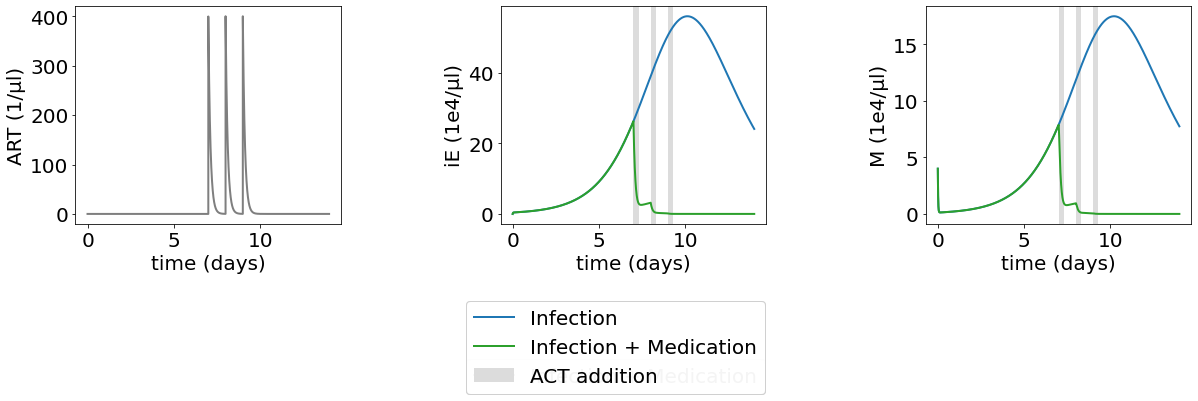

In [13]:
# Laden des Modells
OIE = te.loada('OIE_model.ant')
time_max = 14
step_size = 100000 + 1
size_of_font = 20

variables = [ 'ART','iE', 'M']

# Erstellen des Subplots
fig, axs = plt.subplots(1,3, figsize=(20, 4))
fig.subplots_adjust(hspace=0.4, wspace= 0.6)

# Durchläufe für jede Variable
for i, var in enumerate(variables):
    OIE.resetToOrigin()
    OIE.events_medication_on = False
    result1 = OIE.simulate(0, time_max, step_size, ['time', var])
    OIE.resetToOrigin()
    OIE.BH_max = 0
    result2 = OIE.simulate(0, time_max, step_size, ['time', var])
    OIE.resetToOrigin()
    OIE.BH_max = 2
    result3 = OIE.simulate(0, time_max, step_size, ['time', var])


    # Hinzufügen des Plots zum Subplot
    ax = axs[i]
    if var == 'ART':
        ax.plot(result2['time'], result2[var], label='Infection + Medication', color='tab:gray', linewidth=2)
    else:
        ax.plot(result1['time'], result1[var]/10000, label='Infection', color = 'tab:blue',  linewidth=2)
        ax.plot(result2['time'], result2[var]/10000, label='Infection + Medication', color='tab:green', linewidth=2)
        ax.axvspan(7, 7.3, facecolor='gainsboro', alpha=1, label='ACT addition')
        ax.axvspan(8, 8.3, facecolor='gainsboro', alpha=1)
        ax.axvspan(9, 9.3, facecolor='gainsboro', alpha=1)
    #ax.plot(result3['time'], result2[var], label='Infektion + Medikament+Feedback', linewidth=2)

    ax.tick_params(labelsize=size_of_font) # Größe Achseneinteilungen (zahlen)
    ax.set_xlabel('time (days)', fontsize= size_of_font)
    if var == 'ART':
        ax.set_ylabel(var+ ' (1/µl)' , fontsize= size_of_font)
    else: ax.set_ylabel(var+ ' (1e4/µl)' , fontsize= size_of_font)
    #ax.set_title(var + '-Simulationen')
    ax.legend(fontsize = size_of_font, loc='upper right') # Größe legende

    handles, labels = ax.get_legend_handles_labels()  # Legend Box outsides Subplots
    fig.legend(handles, labels, loc='lower center',   bbox_to_anchor=(0.5, -0.5), fontsize= size_of_font)
    ax.get_legend().remove()  # entfernt Legende aus einzelnen Plots

# Anzeigen der Plots
plt.show()

# medication (3 times) decrease first iE, then M to 0
# 50% von iE -> oiE (fitting wie viele), manche iE werden noch zu M

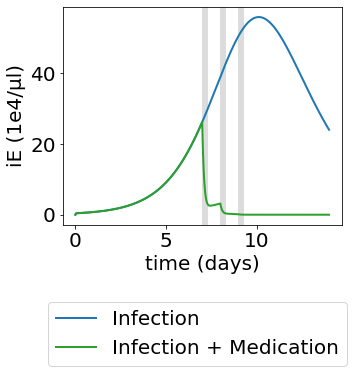

In [14]:
# Laden des Modells
OIE = te.loada('OIE_model.ant')
time_max = 14
step_size = 100000 + 1
size_of_font = 20


# Erstellen des Subplots
fig, ax = plt.subplots( figsize=(5, 4))
fig.subplots_adjust(hspace=0.4, wspace= 0.6)

# Durchläufe für jede Variable

OIE.resetToOrigin()
OIE.events_medication_on = False
result1 = OIE.simulate(0, time_max, step_size, ['time', 'iE'])
OIE.resetToOrigin()
OIE.BH_max = 0
result2 = OIE.simulate(0, time_max, step_size, ['time', 'iE'])
OIE.resetToOrigin()
OIE.BH_max = 2
result3 = OIE.simulate(0, time_max, step_size, ['time', 'iE'])


    # Hinzufügen des Plots zum Subplot

ax.plot(result1['time'], result1['iE']/10000, label='Infection', color = 'tab:blue',  linewidth=2)
ax.plot(result2['time'], result2['iE']/10000, label='Infection + Medication', color='tab:green', linewidth=2)
#ax.plot(result3['time'], result2['iE'], label='Infektion + Medikament+Feedback', linewidth=2)
ax.axvspan(7, 7.3, facecolor='gainsboro', alpha=1)
ax.axvspan(8, 8.3, facecolor='gainsboro', alpha=1)
ax.axvspan(9, 9.3, facecolor='gainsboro', alpha=1)

ax.tick_params(labelsize=size_of_font) # Größe Achseneinteilungen (zahlen)
ax.set_xlabel('time (days)', fontsize= size_of_font)
ax.set_ylabel('iE'+ ' (1e4/µl)' , fontsize= size_of_font)
#ax.set_title('iE' + '-Simulationen')
ax.legend(fontsize = size_of_font, loc='upper right') # Größe legende

handles, labels = ax.get_legend_handles_labels()  # Legend Box outsides Subplots
fig.legend(handles, labels, loc='lower center',   bbox_to_anchor=(0.5, -0.4), fontsize= size_of_font)
ax.get_legend().remove()  # entfernt Legende aus einzelnen Plots

# Anzeigen der Plots
plt.show()

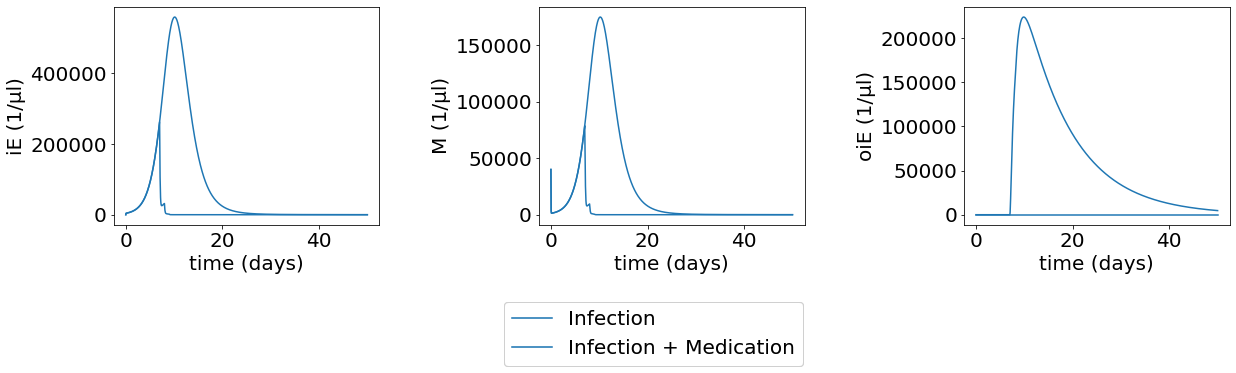

In [15]:
# Laden des Modells
OIE = te.loada('OIE_model.ant')
time_max = 50
step_size = 1000 + 1
size_of_font = 20

variables = [ 'iE', 'M', 'oiE']

# Erstellen des Subplots
fig, axs = plt.subplots(1,3, figsize=(20, 4))
fig.subplots_adjust(hspace=0.4, wspace= 0.6)

# Durchläufe für jede Variable
for i, var in enumerate(variables):
    OIE.resetToOrigin()
    OIE.events_medication_on = False
    result1 = OIE.simulate(0, time_max, step_size, ['time', var])
    OIE.resetToOrigin()
    OIE.BH_max = 0
    result2 = OIE.simulate(0, time_max, step_size, ['time', var])
    OIE.resetToOrigin()
    OIE.BH_max = 2
    result3 = OIE.simulate(0, time_max, step_size, ['time', var])


    # Hinzufügen des Plots zum Subplot
    ax = axs[i]
    ax.plot(result1['time'], result1[var], label='Infection', color = 'tab:blue')
    ax.plot(result2['time'], result2[var], label='Infection + Medication', color='tab:blue')
    #ax.plot(result3['time'], result2[var], label='Infektion + Medikament+Feedback')

    ax.tick_params(labelsize=size_of_font) # Größe Achseneinteilungen (zahlen)
    ax.set_xlabel('time (days)', fontsize= size_of_font)
    ax.set_ylabel(var+ ' (1/µl)' , fontsize= size_of_font)
    #ax.set_title(var + '-Simulationen')
    ax.legend(fontsize = size_of_font, loc='upper right') # Größe legende

    handles, labels = ax.get_legend_handles_labels()  # Legend Box outsides Subplots
    fig.legend(handles, labels, loc='lower center',   bbox_to_anchor=(0.5, -0.4), fontsize= size_of_font)
    ax.get_legend().remove()  # entfernt Legende aus einzelnen Plots

# Anzeigen der Plots
plt.show()

# medication (3 times) decrease first iE, then M to 0
# 50% von iE -> oiE (fitting wie viele), manche iE werden noch zu M

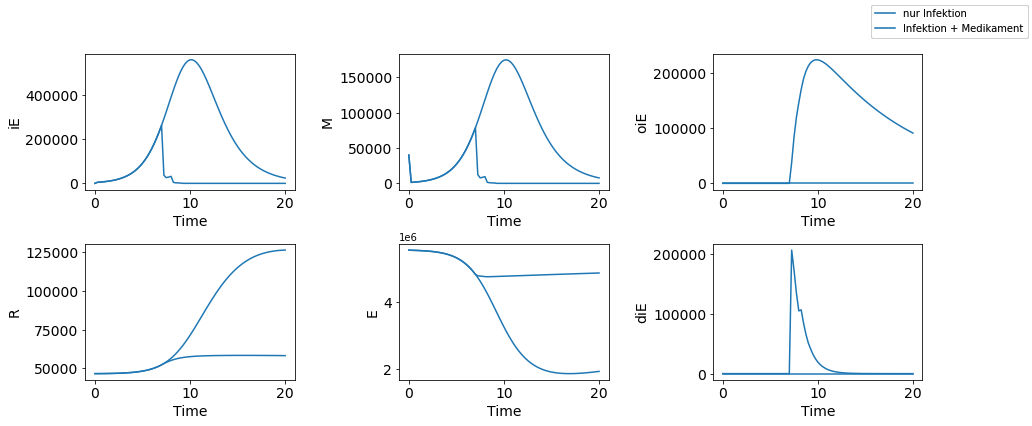

In [16]:
# Laden des Modells
OIE = te.loada('OIE_model.ant')
time_max = 20
step_size = time_max * 4 + 1
size_of_font = 14

variables = [ 'iE', 'M', 'oiE', 'R', 'E', 'diE']

# Erstellen des Subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 6))
fig.subplots_adjust(hspace=0.4, wspace= 0.5)

# Durchläufe für jede Variable
for i, var in enumerate(variables):
    OIE.resetToOrigin()
    OIE.events_medication_on = False
    result1 = OIE.simulate(0, time_max, step_size, ['time', var])
    OIE.resetToOrigin()
    OIE.BH_max = 0
    result2 = OIE.simulate(0, time_max, step_size, ['time', var])

    # Hinzufügen des Plots zum Subplot
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    ax.plot(result1['time'], result1[var], label='nur Infektion', color ='tab:blue')
    ax.plot(result2['time'], result2[var], label='Infektion + Medikament', color = 'tab:blue')
    #ax.plot(result3['time'], result2[var], label='Infektion + Medikament+Feedback')

    ax.tick_params(labelsize=size_of_font) # Größe Achseneinteilungen (zahlen)
    ax.set_xlabel('Time', fontsize= size_of_font)
    ax.set_ylabel(var, fontsize= size_of_font)
    #ax.set_title(var + '-Simulationen')
    ax.legend(fontsize = size_of_font, loc='upper right') # Größe legende

    handles, labels = ax.get_legend_handles_labels()  # Legend Box outsides Subplots
    fig.legend(handles, labels, loc='upper right')
    
    ax.get_legend().remove()  # entfernt Legende aus einzelnen Plots
# Anzeigen der Plots
plt.show()

# medication (3 times) decrease first iE, then M to 0
# 50% von iE -> oiE (fitting wie viele), manche iE werden noch zu M

## Effect of with/without Feedback on Erythropoiesis 
- Subplots vergleich Spezies für nur Infektion, Infektion + Medikament , Infektion + Medikament + Bystander Feedback

oiE
E
Hb
EPO
P
R


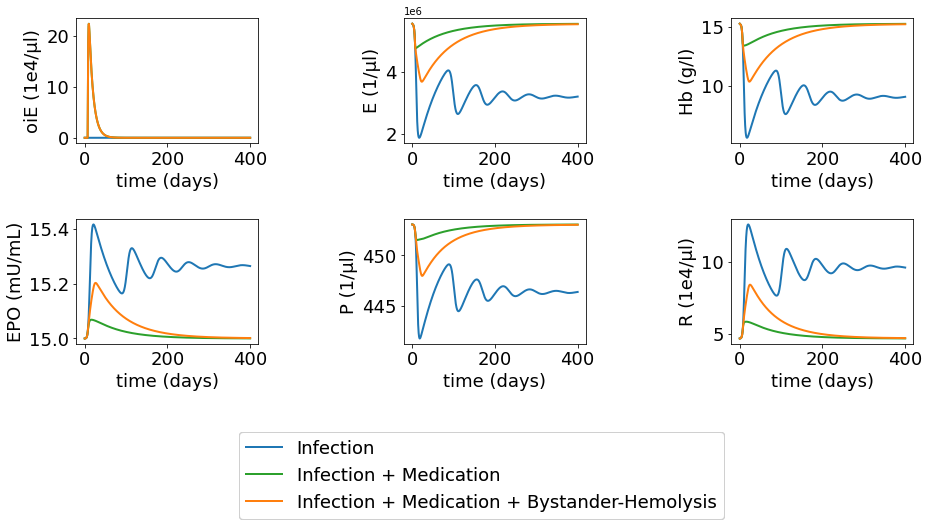

In [17]:
# Laden des Modells
OIE = te.loada('OIE_model.ant')
time_max = 400
step_size = time_max * 4 + 1
size_of_font = 18

variables = ['oiE', 'E', 'Hb', 'EPO','P', 'R']

# Erstellen des Subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 6))
fig.subplots_adjust(hspace=0.6, wspace= 0.8)

# Durchläufe für jede Variable
for i, var in enumerate(variables):
    OIE.resetToOrigin()
    OIE.events_medication_on = False
    result1 = OIE.simulate(0, time_max, step_size, ['time', var])
    OIE.resetToOrigin()
    OIE.BH_max = 0
    result2 = OIE.simulate(0, time_max, step_size, ['time', var])
    OIE.resetToOrigin()
    OIE.BH_max = 2
    result3 = OIE.simulate(0, time_max, step_size, ['time', var])

    # Hinzufügen des Plots zum Subplot
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    print(var)
    if var == 'oiE' or var == 'R': 
        ax.plot(result1['time'], result1[var]/10000, label='Infection',color ='tab:blue',  linewidth=2)
        ax.plot(result2['time'], result2[var]/10000, label='Infection + Medication', color = 'tab:green',  linewidth=2)
        ax.plot(result3['time'], result3[var]/10000, label='Infection + Medication + Bystander-Hemolysis', color = 'tab:orange', linewidth=2)
        #ax.axvspan(7, 9, facecolor='gray', alpha=1)
    else:
        ax.plot(result1['time'], result1[var], label='Infection',color ='tab:blue',  linewidth=2)
        ax.plot(result2['time'], result2[var], label='Infection + Medication', color = 'tab:green',  linewidth=2)
        ax.plot(result3['time'], result3[var], label='Infection + Medication + Bystander-Hemolysis', color = 'tab:orange', linewidth=2)
        #ax.axvspan(7, 9, facecolor='gray', alpha=1)

    ax.tick_params(labelsize=size_of_font) # Größe Achseneinteilungen (zahlen)
    ax.set_xlabel('time (days)', fontsize= size_of_font)

    if var == 'Hb': ax.set_ylabel(var+ ' (g/l)', fontsize= size_of_font)   
    elif var == 'oiE' or var == 'R': ax.set_ylabel(var+ ' (1e4/µl)', fontsize= size_of_font)  
    elif var == 'EPO': ax.set_ylabel(var+' (mU/mL)', fontsize= size_of_font)   
    else: ax.set_ylabel(var+ ' (1/µl)', fontsize= size_of_font)
    
    #ax.set_title(var + '-Simulationen')
    ax.legend(fontsize = size_of_font, loc='upper right') # Größe legende

    handles, labels = ax.get_legend_handles_labels()  # Legend Box outsides Subplots
    fig.legend(handles, labels, loc='lower center',   bbox_to_anchor=(0.5, -0.3),  fontsize= size_of_font)
    
    ax.get_legend().remove()  # entfernt Legende aus einzelnen Plots
# Anzeigen der Plots
plt.show()




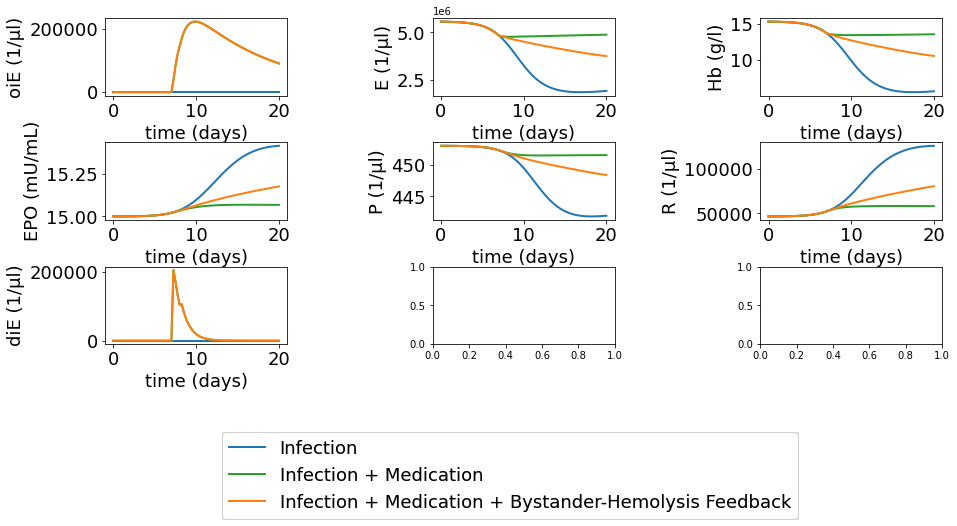

In [18]:
# Laden des Modells
OIE = te.loada('OIE_model.ant')
time_max = 20
step_size = time_max * 4 + 1
size_of_font = 18

variables = ['oiE', 'E', 'Hb', 'EPO', 'P', 'R', 'diE' ]

# Erstellen des Subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 6))
fig.subplots_adjust(hspace=0.6, wspace= 0.8)

# Durchläufe für jede Variable
for i, var in enumerate(variables):
    OIE.resetToOrigin()
    OIE.events_medication_on = False
    result1 = OIE.simulate(0, time_max, step_size, ['time', var])
    OIE.resetToOrigin()
    OIE.BH_max = 0
    result2 = OIE.simulate(0, time_max, step_size, ['time', var])
    OIE.resetToOrigin()
    OIE.BH_max = 2
    result3 = OIE.simulate(0, time_max, step_size, ['time', var])

    # Hinzufügen des Plots zum Subplot
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    ax.plot(result1['time'], result1[var], label='Infection',color ='tab:blue',  linewidth=2)
    ax.plot(result2['time'], result2[var], label='Infection + Medication', color = 'tab:green',  linewidth=2)
    ax.plot(result3['time'], result3[var], label='Infection + Medication + Bystander-Hemolysis Feedback', color = 'tab:orange', linewidth=2)
    #ax.axvspan(7, 9, facecolor='gray', alpha=1)

    ax.tick_params(labelsize=size_of_font) # Größe Achseneinteilungen (zahlen)
    ax.set_xlabel('time (days)', fontsize= size_of_font)

    if var == 'Hb': ax.set_ylabel(var+ ' (g/l)', fontsize= size_of_font)   
    elif var == 'EPO': ax.set_ylabel(var+' (mU/mL)', fontsize= size_of_font)   
    else: ax.set_ylabel(var+ ' (1/µl)', fontsize= size_of_font)
    
    #ax.set_title(var + '-Simulationen')
    ax.legend(fontsize = size_of_font, loc='upper right') # Größe legende

    handles, labels = ax.get_legend_handles_labels()  # Legend Box outsides Subplots
    fig.legend(handles, labels, loc='lower center',   bbox_to_anchor=(0.5, -0.3),  fontsize= size_of_font)
    
    ax.get_legend().remove()  # entfernt Legende aus einzelnen Plots
# Anzeigen der Plots
plt.show()

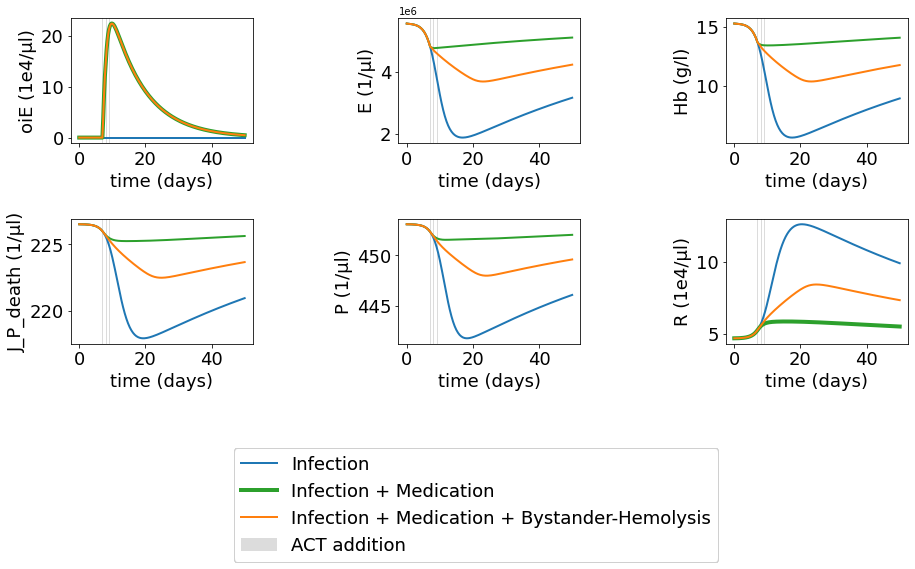

In [35]:
# Laden des Modells
OIE = te.loada('OIE_model.ant')
time_max = 50
step_size = time_max * 4 + 1
size_of_font = 18

variables = ['oiE', 'E', 'Hb', 'J_P_death','P', 'R']

# Erstellen des Subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 6))
fig.subplots_adjust(hspace=0.6, wspace= 0.8)

# Durchläufe für jede Variable
for i, var in enumerate(variables):
    OIE.resetToOrigin()
    OIE.events_medication_on = False
    result1 = OIE.simulate(0, time_max, step_size, ['time', var])
    OIE.resetToOrigin()
    OIE.BH_max = 0
    result2 = OIE.simulate(0, time_max, step_size, ['time', var])
    OIE.resetToOrigin()
    OIE.BH_max = 2
    result3 = OIE.simulate(0, time_max, step_size, ['time', var])

    # Hinzufügen des Plots zum Subplot
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    
    if var == 'oiE' or var == 'R':
        ax.plot(result1['time'], result1[var]/10000, label='Infection',color ='tab:blue',  linewidth=2)
        ax.plot(result2['time'], result2[var]/10000, label='Infection + Medication', color = 'tab:green',  linewidth=4)
        ax.plot(result3['time'], result3[var]/10000, label='Infection + Medication + Bystander-Hemolysis', color = 'tab:orange', linewidth=2)
    else: 
        ax.plot(result1['time'], result1[var], label='Infection',color ='tab:blue',  linewidth=2)
        ax.plot(result2['time'], result2[var], label='Infection + Medication', color = 'tab:green',  linewidth=2)
        ax.plot(result3['time'], result3[var], label='Infection + Medication + Bystander-Hemolysis', color = 'tab:orange', linewidth=2)
    #ax.axvspan(7, 9, facecolor='gray', alpha=1)
    ax.axvspan(7, 7.3, facecolor='gainsboro', alpha=1, label='ACT addition')
    ax.axvspan(8, 8.3, facecolor='gainsboro', alpha=1)
    ax.axvspan(9, 9.3, facecolor='gainsboro', alpha=1)

    ax.tick_params(labelsize=size_of_font) # Größe Achseneinteilungen (zahlen)
    ax.set_xlabel('time (days)', fontsize= size_of_font)

    if var == 'Hb': ax.set_ylabel(var+ ' (g/l)', fontsize= size_of_font) 
    elif var == 'R' or var == 'oiE': ax.set_ylabel(var+ ' (1e4/µl)', fontsize= size_of_font)
    elif var == 'EPO': ax.set_ylabel(var+' (mU/mL)', fontsize= size_of_font)   
    else: ax.set_ylabel(var+ ' (1/µl)', fontsize= size_of_font)
    
    #ax.set_title(var + '-Simulationen')
    ax.legend(fontsize = size_of_font, loc='upper right') # Größe legende

    handles, labels = ax.get_legend_handles_labels()  # Legend Box outsides Subplots
    fig.legend(handles, labels, loc='lower center',   bbox_to_anchor=(0.5, -0.4),  fontsize= size_of_font)
    
    ax.get_legend().remove()  # entfernt Legende aus einzelnen Plots
# Anzeigen der Plots
plt.show()

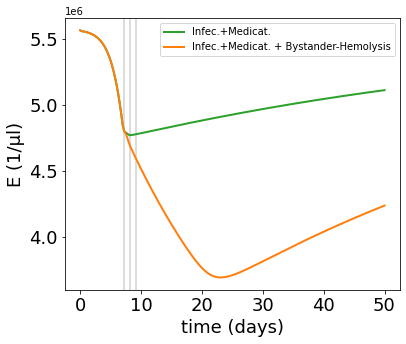

In [20]:
# Laden des Modells
OIE = te.loada('OIE_model.ant')
time_max = 50
step_size = time_max * 4 + 1

# Erstellen des Subplots
fig, axs = plt.subplots(1, 1, figsize=(6, 5))

# Simulation der Variable 'E' für die verschiedenen Zustände
for BH_max, color in [(0, 'tab:green'), (2, 'tab:orange')]:
    OIE.resetToOrigin()
    OIE.BH_max = BH_max
    result = OIE.simulate(0, time_max, step_size, ['time', 'E'])
    axs.plot(result['time'], result['E'], label=f'Infec.+Medicat.{" + Bystander-Hemolysis" if BH_max == 2 else ""}', color=color, linewidth=2)
    axs.axvspan(7, 7.3, facecolor='gainsboro', alpha=1)
    axs.axvspan(8, 8.3, facecolor='gainsboro', alpha=1)
    axs.axvspan(9, 9.3, facecolor='gainsboro', alpha=1)   
# Einstellen der Achsenbeschriftungen und der Legende
axs.tick_params(labelsize=18)
axs.set_xlabel('time (days)', fontsize=18)
axs.set_ylabel('E (1/µl)', fontsize=18)
axs.legend(fontsize=10, loc='upper right')

# Anzeigen der Plots
plt.show()

### Plot Knick

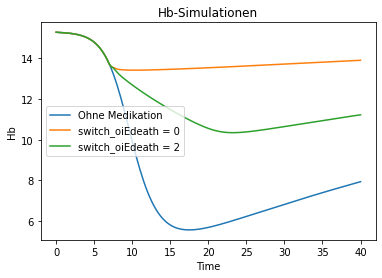

In [21]:
#Knick nicht erkennbar

# Laden des Modells
OIE = te.loada('OIE_model.ant')
time_max = 40
step_size = time_max *4 +1

# Erster Durchlauf ohne Medikation
OIE.resetToOrigin()
OIE.events_medication_on = False
result1 = OIE.simulate(0, time_max, step_size , ['time', 'Hb'])

# Zweiter Durchlauf mit BH_max = 0
OIE.resetToOrigin()
OIE.BH_max = 0
result2 = OIE.simulate(0, time_max, step_size , ['time', 'Hb'])

# Dritter Durchlauf mit BH_max = 2
OIE.resetToOrigin()
OIE.BH_max = 2
result3 = OIE.simulate(0, time_max, step_size , ['time', 'Hb'])

# Erstellen des Plots
fig, ax = plt.subplots()

# Hinzufügen der Ergebnisse für jeden Durchlauf zum Plot
ax.plot(result1['time'], result1['Hb'], label='Ohne Medikation')
ax.plot(result2['time'], result2['Hb'], label='BH_max = 0')
ax.plot(result3['time'], result3['Hb'], label='BH_max = 2')

# Beschriftung der Achsen und Titel des Plots
ax.set_xlabel('Time')
ax.set_ylabel('Hb')
ax.set_title('Hb-Simulationen')


# Hinzufügen einer Legende
ax.legend()

# Anzeigen des Plots
plt.show()

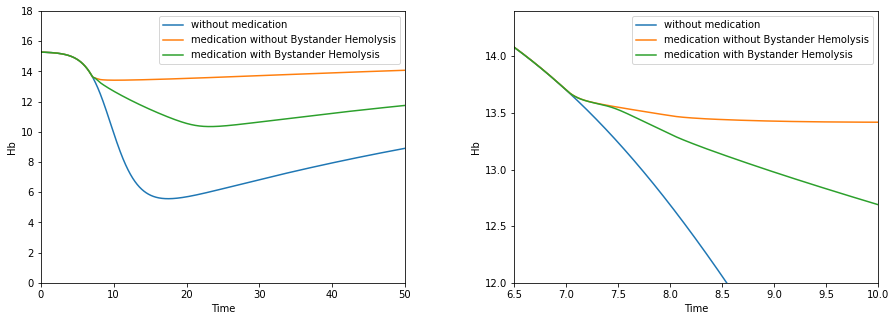

In [22]:
#Knick nicht erkennbar

# Laden des Modells
OIE = te.loada('OIE_model.ant')
time_max = 200
step_size = 1000000 +1

# Erster Durchlauf ohne Medikation
OIE.resetToOrigin()
OIE.events_medication_on = False
result1 = OIE.simulate(0, time_max, step_size , ['time', 'Hb'])
# Zweiter Durchlauf mit BH_max = 0
OIE.resetToOrigin()
OIE.BH_max = 0
result2 = OIE.simulate(0, time_max, step_size , ['time', 'Hb'])
# Dritter Durchlauf mit BH_max = 2
OIE.resetToOrigin()
OIE.BH_max = 2
result3 = OIE.simulate(0, time_max, step_size , ['time', 'Hb'])

# Erstellen des Plots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
fig.subplots_adjust(wspace=0.3)

# Hinzufügen der Ergebnisse für jeden Durchlauf zum Plot
ax1.plot(result1['time'], result1['Hb'], label='without medication')
ax1.plot(result2['time'], result2['Hb'], label='medication without Bystander Hemolysis')
ax1.plot(result3['time'], result3['Hb'], label='medication with Bystander Hemolysis')
# Beschriftung der Achsen und Titel des Plots
ax1.set_xlabel('Time')
ax1.set_ylabel('Hb')
#ax1.set_title('Hb-Simulationen')
ax1.set_ylim([0,18])
ax1.set_xlim([0, 50])
# Hinzufügen einer Legende
ax1.legend()

# Hinzufügen der Ergebnisse für jeden Durchlauf zum Plot
ax2.plot(result1['time'], result1['Hb'], label='without medication')
ax2.plot(result2['time'], result2['Hb'], label='medication without Bystander Hemolysis')
ax2.plot(result3['time'], result3['Hb'], label='medication with Bystander Hemolysis')
# Beschriftung der Achsen und Titel des Plots
ax2.set_xlabel('Time')
ax2.set_ylabel('Hb')
#ax2.set_title('Hb-Simulationen')
ax2.set_ylim([12, 14.4])
ax2.set_xlim([6.5, 10])
# Hinzufügen einer Legende
ax2.legend()

# Anzeigen des Plots
plt.show()


#Interpretation
# same Plot rechts, tiefer reingezogen

# ohne Medikament:  iE steigt, Hb sinkt, steigt wieder (ossziliert)
# - iE sinkt durch ART -> Hb steigt leicht
# ohne Feedback: wenn iE 0 kein sinken von Hb mehr -> erholt sich
# mit Feedback: Hb sinkt weiter auch wenn keine iE mehr vorhanden sind, da sobald oiE da sind oiE sterben und der Fluss Sterberate von E verringert -> E sinkt -> Hb sinkt
#

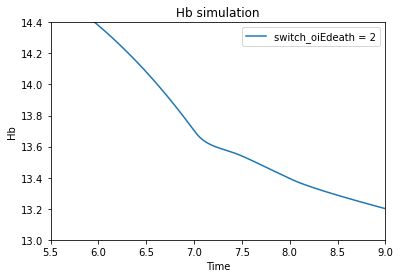

In [23]:
# Laden des Modells
OIE = te.loada('OIE_model.ant')
time_max = 20
step_size = time_max *400 +1
# Simulation mit BH_max = 2
OIE.resetToOrigin()
OIE.BH_max = 1
result = OIE.simulate(0, time_max, step_size , ['time', 'Hb'])
# Erstellen des Plots
fig, ax = plt.subplots()
# Hinzufügen der Ergebnisse für jeden Durchlauf zum Plot
ax.plot(result['time'], result['Hb'], label='BH_max = 2')
#Ändeurng y-Achsenabschnitt
ax.set_ylim([13, 14.4])
ax.set_xlim([5.5, 9])
# Beschriftung der Achsen und Titel des Plots
ax.set_xlabel('Time')
ax.set_ylabel('Hb')
ax.set_title('Hb simulation')

# Hinzufügen einer Legende
ax.legend()

# Anzeigen des Plots
plt.show()


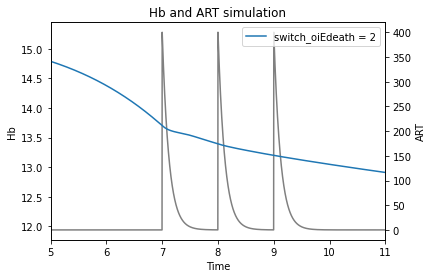

In [24]:
# Laden des Modells
OIE = te.loada('OIE_model.ant')
time_max = 20
step_size = time_max * 400 + 1

# Simulation mit BH_max = 2
OIE.resetToOrigin()
OIE.BH_max = 1
result = OIE.simulate(0, time_max, step_size, ['time', 'Hb', 'ART'])  # Zusätzliche Variable ART

# Erstellen des Plots
fig, ax1 = plt.subplots()  # Erstellen von Subplots mit einer linken Y-Achse (ax1)
ax2 = ax1.twinx()  # Erstellen einer rechten Y-Achse (ax2)

# Hinzufügen der Ergebnisse für jeden Durchlauf zum Plot
ax1.plot(result['time'], result['Hb'], label='BH_max = 2')  
ax2.plot(result['time'], result['ART'], label='ART', color='gray')  



# Änderung der Y-Achsenabschnitte
#ax1.set_ylim([13, 14.4])
#ax2.set_ylim([0, 10])  # Beispielhafter Abschnitt für die rechte Y-Achse
ax1.set_xlim([5, 11])

# Beschriftung der Achsen und Titel des Plots
ax1.set_xlabel('Time')
ax1.set_ylabel('Hb')
ax2.set_ylabel('ART')  # Beschriftung der rechten Y-Achse
ax1.set_title('Hb and ART simulation')

# Hinzufügen einer Legende
ax1.legend()

#Ändert Plot Reihenfolge, sodass Hb dominant ist
ax1.set_zorder(2)
ax2.set_zorder(1)
ax1.patch.set_visible(False)

# Anzeigen des Plots
plt.show()

#Huckel entstehen durch 3 fache zugabe von ART
#erst erholt sich Hb durch weniger INfektionen, dann steigen wieder infektionen durch M

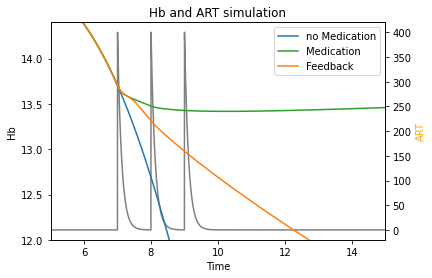

In [25]:
# Laden des Modells
OIE = te.loada('OIE_model.ant')
time_max = 20
step_size = time_max * 400 + 1

# Simulationen mit unterschiedlichen Schaltern
OIE.resetToOrigin()
OIE.events_medication_on = False
result1 = OIE.simulate(0, time_max, step_size , ['time', 'Hb'])

OIE.resetToOrigin()
OIE.BH_max = 0
result2 = OIE.simulate(0, time_max, step_size , ['time', 'Hb'])

OIE.resetToOrigin()
OIE.BH_max = 2
result3 = OIE.simulate(0, time_max, step_size , ['time', 'Hb', 'ART'])

# Erstellen des Plots
fig, ax1 = plt.subplots()  # Erstellen von Subplots mit einer linken Y-Achse (ax1)
ax2 = ax1.twinx()  # Erstellen einer rechten Y-Achse (ax2)

# Hinzufügen der Ergebnisse für jeden Durchlauf zum Plot
ax1.plot(result1['time'], result1['Hb'], label='no Medication', color='tab:blue')  
ax1.plot(result2['time'], result2['Hb'], label='Medication', color='tab:green')  
ax1.plot(result3['time'], result3['Hb'], label='Feedback', color='tab:orange') 
ax2.plot(result3['time'], result3['ART'], label='ART', color='gray') 

# Änderung der Y-Achsenabschnitte
ax1.set_ylim([12, 14.4])
#ax2.set_ylim([0, 10])
ax1.set_xlim([5, 15])

# Beschriftung der Achsen und Titel des Plots
ax1.set_xlabel('Time')
ax1.set_ylabel('Hb')
ax2.set_ylabel('ART', color='orange')  # Beschriftung der rechten Y-Achse
ax1.set_title('Hb and ART simulation')

# Hinzufügen einer Legende
ax1.legend()

# Setzen des Z-Index, damit die linke Achse vorne liegt
ax1.set_zorder(2)
ax2.set_zorder(1)
ax1.patch.set_visible(False)

# Anzeigen des Plots
plt.show()

/tmp/ipykernel_18692/161519928.py:32: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/tmp/ipykernel_18692/161519928.py:33: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/tmp/ipykernel_18692/161519928.py:34: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



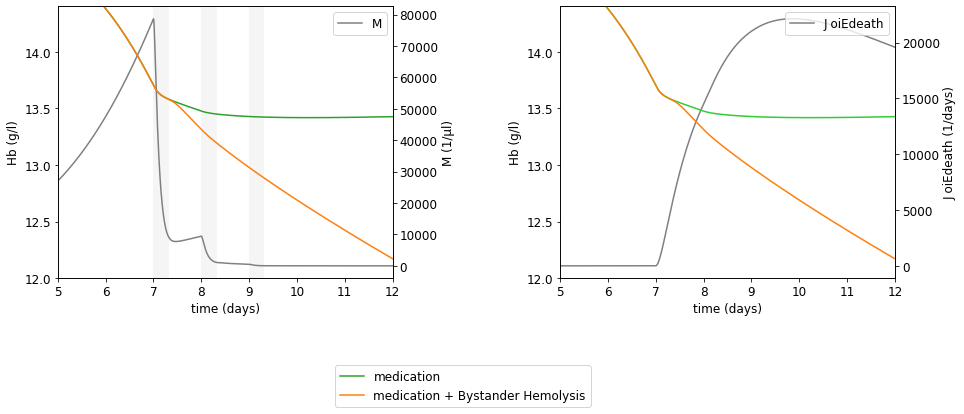

In [26]:
# Laden des Modells
OIE = te.loada('OIE_model.ant')
time_max = 40
step_size = time_max * 400 + 1
size_of_font = 12

# Simulationen mit unterschiedlichen Schaltern
OIE.resetToOrigin()
OIE.events_medication_on = False
result1 = OIE.simulate(0, time_max, step_size, ['time', 'Hb'])

OIE.resetToOrigin()
OIE.BH_max = 0
result2 = OIE.simulate(0, time_max, step_size, ['time', 'Hb'])

OIE.resetToOrigin()
OIE.BH_max = 2
result3 = OIE.simulate(0, time_max, step_size, ['time', 'Hb', 'J_oiE_death', '[M]'])

# Erstellen des Plots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
fig.subplots_adjust(wspace=0.5, hspace = 0.5)
ax11 = ax1.twinx()  # Erstellen einer rechten Y-Achse (ax2)
ax22 = ax2.twinx()  # Erstellen einer rechten Y-Achse (ax2)


# Hinzufügen der Ergebnisse für jeden Durchlauf zum Plot
#ax1.plot(result1['time'], result1['Hb'], label='no medication', color = 'tab:blue' )  
ax1.plot(result2['time'], result2['Hb'], label='medication', color ='tab:green' )  
ax1.plot(result3['time'], result3['Hb'], label='medication + Bystander Hemolysis', color ='tab:orange' ) 
ax11.plot(result3['time'], result3['[M]'], label='M', color = 'gray') 
ax11.axvspan(7, 7.3, facecolor='gray', alpha=1, color = 'whitesmoke')
ax11.axvspan(8, 8.3, facecolor='gray', alpha=1, color = 'whitesmoke')
ax11.axvspan(9, 9.3, facecolor='gray', alpha=1, color = 'whitesmoke')

ax1.tick_params(labelsize=size_of_font)  # Schriftgröße Achseneinteilung
ax11.tick_params(labelsize=size_of_font)
ax1.set_ylim([12, 14.4])
ax1.set_xlim([5,12])
ax1.set_xlabel( 'time (days)', fontsize=size_of_font)
ax1.set_ylabel('Hb (g/l)', fontsize=size_of_font)
ax11.set_ylabel('M (1/µl)', fontsize=size_of_font)
#ax1.set_title('Hb and J_oiE_death simulation - Hb')
ax1.legend(loc='upper left')
ax11.legend(fontsize=size_of_font, loc='upper right')

ax1.set_zorder(2)
ax11.set_zorder(1)
ax1.patch.set_visible(False)


#ax2.plot(result1['time'], result1['Hb'], label='no Medication', color ='tab:blue' )  
ax2.plot(result2['time'], result2['Hb'], label='medication', color = 'limegreen')  
ax2.plot(result3['time'], result3['Hb'], label='medication + Bystander Hemolysis', color ='tab:orange') 
ax22.plot(result3['time'], result3['J_oiE_death'], label='J oiEdeath', color = 'gray') 
ax2.tick_params(labelsize=size_of_font)   #Schriftgröße Achseneinteilung
ax22.tick_params(labelsize=size_of_font)
ax2.set_ylim([12, 14.4])
ax2.set_xlim([5,12])
ax2.set_xlabel('time (days)', fontsize=size_of_font)
ax2.set_ylabel('Hb (g/l)', fontsize=size_of_font)
ax22.set_ylabel('J oiEdeath (1/days)', fontsize=size_of_font)
#ax2.set_title('Hb and J_oiE_death simulation - Hb')
#ax2.legend(loc='upper left')
ax22.legend(loc='upper right', fontsize=size_of_font)

ax2.set_zorder(2)
ax22.set_zorder(1)
ax2.patch.set_visible(False)

ax1.legend(fontsize = size_of_font, loc='upper right') # Größe legende
handles, labels = ax1.get_legend_handles_labels()  # Legend Box outsides Subplots
fig.legend(handles, labels,   bbox_to_anchor=(0.5, -0.1), fontsize=size_of_font, loc='upper center')
ax1.get_legend().remove()  # entfernt Legende aus einzelnen Plots

# Anzeigen des Plots
plt.show()

# Hb- Kurven für Medikament mit /ohne Feedback 

#vielleicht nur iE nutzen für medikament zugabe Wirkung zeigen 
# - more parasite -> more infected -> hb sinkt
# - less Merozoites durch ART -> Hb steigt leicht
# ohne Feedback: wenn iE 0 kein sinken von Hb mehr -> erholt sich
# mit Feedback: Hb sinkt weiter auch wenn keine iE mehr vorhanden die E rausnehmen wodurch Hb sinkt


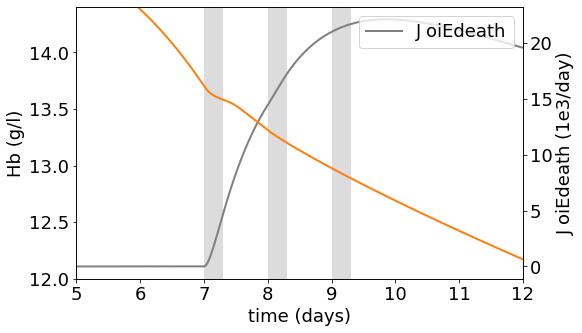

In [27]:
# Laden des Modells
OIE = te.loada('OIE_model.ant')
time_max = 40
step_size = time_max * 400 + 1
size_of_font = 18

# Simulationen mit unterschiedlichen Schaltern
OIE.resetToOrigin()
OIE.BH_max = 2
result3 = OIE.simulate(0, time_max, step_size, ['time', 'Hb', 'J_oiE_death', '[M]'])

# Erstellen des Plots
fig, ax2 = plt.subplots(ncols=1, figsize=(8,5))
ax22 = ax2.twinx()  # Erstellen einer rechten Y-Achse (ax2)

# Hinzufügen der Ergebnisse für jeden Durchlauf zum Plot
ax2.plot(result3['time'], result3['Hb'], label='medication + Bystander Hemolysis', color ='tab:orange', linewidth = 2) 
ax22.plot(result3['time'], result3['J_oiE_death']/1000, label='J oiEdeath', color = 'grey', linewidth = 2) 
ax22.axvspan(7, 7.3, facecolor='gainsboro', alpha=1)
ax22.axvspan(8, 8.3, facecolor='gainsboro', alpha=1)
ax22.axvspan(9, 9.3, facecolor='gainsboro', alpha=1)

ax2.tick_params(labelsize=size_of_font)   #Schriftgröße Achseneinteilung
ax22.tick_params(labelsize=size_of_font)
ax2.set_ylim([12, 14.4])
ax2.set_xlim([5,12])
ax2.set_xlabel('time (days)', fontsize=size_of_font)
ax2.set_ylabel('Hb (g/l)', fontsize=size_of_font)
ax22.set_ylabel('J oiEdeath (1e3/day)', fontsize=size_of_font)
ax22.legend(loc='upper right', fontsize=size_of_font)

ax2.set_zorder(2)
ax22.set_zorder(1)
ax2.patch.set_visible(False)

# Anzeigen des Plots
plt.show()

# Hb- Kurven für Medikament mit /ohne Feedback 

#vielleicht nur iE nutzen für medikament zugabe Wirkung zeigen 
# - more parasite -> more infected -> hb sinkt
# - less Merozoites durch ART -> Hb steigt leicht
# ohne Feedback: wenn iE 0 kein sinken von Hb mehr -> erholt sich
# mit Feedback: Hb sinkt weiter auch wenn keine iE mehr vorhanden die E rausnehmen wodurch Hb sinkt

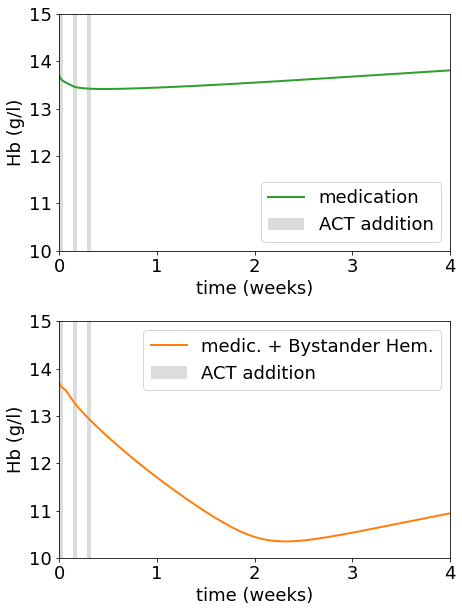

In [28]:
# Laden des Modells
OIE = te.loada('OIE_model.ant')
time_max = 50
step_size = time_max * 400 + 1
size_of_font = 18

# Simulationen mit unterschiedlichen Schaltern
OIE.resetToOrigin()
OIE.events_medication_on = False
result1 = OIE.simulate(0, time_max, step_size, ['time', 'Hb'])
OIE.resetToOrigin()
OIE.BH_max = 0
result2 = OIE.simulate(0, time_max, step_size, ['time', 'Hb'])
OIE.resetToOrigin()
OIE.BH_max = 2
result3 = OIE.simulate(0, time_max, step_size, ['time', 'Hb', 'J_oiE_death', '[M]'])

# Erstellen des Plots
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(7,10))
fig.subplots_adjust(wspace=0.5, hspace = 0.3)
#ax11 = ax1.twinx()  # Erstellen einer rechten Y-Achse (ax2)
#ax22 = ax2.twinx()  # Erstellen einer rechten Y-Achse (ax2)


# Hinzufügen der Ergebnisse für jeden Durchlauf zum Plot
#ax1.plot(result1['time'], result1['Hb'], label='no medication', color = 'tab:blue' )  
ax1.plot((result2['time']-7)/7, result2['Hb'], label='medication', color ='tab:green', linewidth=2 )  
#ax1.plot((result3['time']/7, result3['Hb'], label='medication + Bystander Hemolysis', color ='tab:orange' ) #
ax1.axvspan(0/7, 0.3/7, facecolor='gainsboro', alpha=1, label='ACT addition')
ax1.axvspan(1/7, 1.3/7, facecolor='gainsboro', alpha=1)
ax1.axvspan(2/7, 2.3/7, facecolor='gainsboro', alpha=1)

ax1.tick_params(labelsize=size_of_font)  # Schriftgröße Achseneinteilung
ax11.tick_params(labelsize=size_of_font)
ax1.set_ylim([10, 15])
ax1.set_xlim([0,4])
ax1.set_xlabel( 'time (weeks)', fontsize=size_of_font)
ax1.set_ylabel('Hb (g/l)', fontsize=size_of_font)
#ax1.set_title('Hb and J_oiE_death simulation - Hb')
ax1.legend(loc='lower right',fontsize=size_of_font)


#ax2.plot(result1['time'], result1['Hb'], label='no Medication', color ='tab:blue' )  
#ax2.plot(result2['time']/7, result2['Hb'], label='no medication', color = 'tab:green')  
ax2.plot((result3['time']-7)/7, result3['Hb'], label='medic. + Bystander Hem.', color ='tab:orange', linewidth=2) 
ax2.axvspan(0/7, 0.3/7, facecolor='gainsboro', alpha=1,  label='ACT addition')
ax2.axvspan(1/7, 1.3/7, facecolor='gainsboro', alpha=1)
ax2.axvspan(2/7, 2.3/7, facecolor='gainsboro', alpha=1)



ax2.tick_params(labelsize=size_of_font)   #Schriftgröße Achseneinteilung
ax2.set_ylim([10, 15])
ax2.set_xlim([0,4])
ax2.set_xlabel('time (weeks)', fontsize=size_of_font)
ax2.set_ylabel('Hb (g/l)', fontsize=size_of_font)
#ax2.set_title('Hb and J_oiE_death simulation - Hb')
ax2.legend( fontsize=size_of_font)

# Anzeigen des Plots
plt.show()

# Hb- Kurven für Medikament mit /ohne Feedback 

#vielleicht nur iE nutzen für medikament zugabe Wirkung zeigen 
# - more parasite -> more infected -> hb sinkt
# - less Merozoites durch ART -> Hb steigt leicht
# ohne Feedback: wenn iE 0 kein sinken von Hb mehr -> erholt sich
# mit Feedback: Hb sinkt weiter auch wenn keine iE mehr vorhanden die E rausnehmen wodurch Hb sinkt


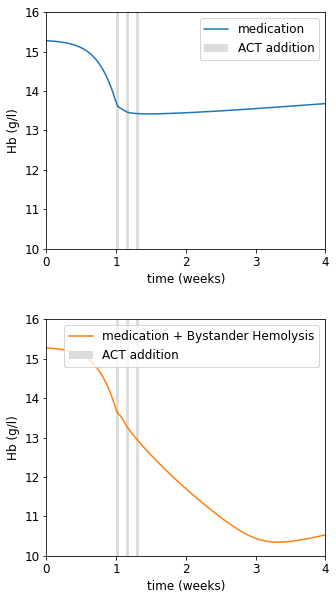

In [29]:
# Laden des Modells
OIE = te.loada('OIE_model.ant')
time_max = 50
step_size = time_max * 400 + 1
size_of_font = 12


# Simulationen mit unterschiedlichen Schaltern
OIE.resetToOrigin()
OIE.events_medication_on = False
result1 = OIE.simulate(0, time_max, step_size, ['time', 'Hb'])
OIE.resetToOrigin()
OIE.BH_max = 0
result2 = OIE.simulate(0, time_max, step_size, ['time', 'Hb'])
OIE.resetToOrigin()
OIE.BH_max = 2
result3 = OIE.simulate(0, time_max, step_size, ['time', 'Hb', 'J_oiE_death', '[M]'])

# Erstellen des Plots
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(5,10))
fig.subplots_adjust(wspace=0.5, hspace = 0.3)
#ax11 = ax1.twinx()  # Erstellen einer rechten Y-Achse (ax2)
#ax22 = ax2.twinx()  # Erstellen einer rechten Y-Achse (ax2)


# Hinzufügen der Ergebnisse für jeden Durchlauf zum Plot
#ax1.plot(result1['time'], result1['Hb'], label='no medication', color = 'tab:blue' )  
ax1.plot((result2['time'])/7, result2['Hb'], label='medication', color ='tab:blue' )  
#ax1.plot((result3['time']/7, result3['Hb'], label='medication + Bystander Hemolysis', color ='tab:orange' ) #
ax1.axvspan(7/7, 7.3/7, facecolor='gainsboro', alpha=1, label='ACT addition')
ax1.axvspan(8/7, 8.3/7, facecolor='gainsboro', alpha=1)
ax1.axvspan(9/7, 9.3/7, facecolor='gainsboro', alpha=1)

ax1.tick_params(labelsize=size_of_font)  # Schriftgröße Achseneinteilung
ax11.tick_params(labelsize=size_of_font)
ax1.set_ylim([10, 16])
ax1.set_xlim([0,4])
ax1.set_xlabel( 'time (weeks)', fontsize=size_of_font)
ax1.set_ylabel('Hb (g/l)', fontsize=size_of_font)
#ax1.set_title('Hb and J_oiE_death simulation - Hb')
ax1.legend(loc='upper right',fontsize=size_of_font)


#ax2.plot(result1['time'], result1['Hb'], label='no Medication', color ='tab:blue' )  
#ax2.plot(result2['time']/7, result2['Hb'], label='no medication', color = 'tab:blue')  
ax2.plot((result3['time'])/7, result3['Hb'], label='medication + Bystander Hemolysis', color ='tab:orange') 
ax2.axvspan(7/7, 7.3/7, facecolor='gainsboro', alpha=1,  label='ACT addition')
ax2.axvspan(8/7, 8.3/7, facecolor='gainsboro', alpha=1)
ax2.axvspan(9/7, 9.3/7, facecolor='gainsboro', alpha=1)



ax2.tick_params(labelsize=size_of_font)   #Schriftgröße Achseneinteilung
ax2.set_ylim([10, 16])
ax2.set_xlim([0,4])
ax2.set_xlabel('time (weeks)', fontsize=size_of_font)
ax2.set_ylabel('Hb (g/l)', fontsize=size_of_font)
#ax2.set_title('Hb and J_oiE_death simulation - Hb')
ax2.legend(loc='upper right', fontsize=size_of_font)

# Anzeigen des Plots
plt.show()

# Hb- Kurven für Medikament mit /ohne Feedback 

#vielleicht nur iE nutzen für medikament zugabe Wirkung zeigen 
# - more parasite -> more infected -> hb sinkt
# - less Merozoites durch ART -> Hb steigt leicht
# ohne Feedback: wenn iE 0 kein sinken von Hb mehr -> erholt sich
# mit Feedback: Hb sinkt weiter auch wenn keine iE mehr vorhanden die E rausnehmen wodurch Hb sinkt

### Simplify Erythropoiesis 

226.520848122859 15.281321478378196 211.2395266444808


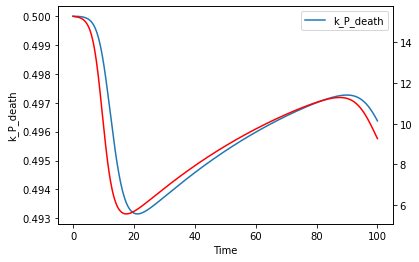

221.94914195383183 9.270086581434043 212.67905537239778


213.59784348741212

In [37]:
# Laden des Modells
OIE = te.loada('OIE_model.ant')
time_max = 100
step_size = 200000
variables = ['J_P_birth','J_P_death', 'Hb', 'k_P_death', 'P']

#without medication
OIE.events_medication_on = False

print(OIE.J_P_death, OIE.Hb, OIE.J_P_death-OIE.Hb)

#simulate
result = OIE.simulate(0, time_max, step_size , ['time']+ variables)
# Erstellen des Plots
fig, ax = plt.subplots()
ax1 = ax.twinx()

# Hinzufügen der Ergebnisse für jeden Durchlauf zum Plot
#ax.plot(result['time'], result[variables[0]], label=variables[0])
#ax.plot(result['time'], result[variables[1]], label=variables[1])
ax1.plot(result['time'], result[variables[2]], label=variables[2], color = 'red')
#ax.plot(result['time'], 0.845673* result[variables[2]]+213.59784348741212, label=variables[2]+'angepasst')
#ax.plot(result['time'], result[variables[0]] - result[variables[2]], label='JPbirth-Hb')
#ax.plot(result['time'], result[variables[0]]-result[variables[1]], label='JPbirth-JPdeath')
ax.plot(result['time'], result[variables[3]], label=variables[3])
# Beschriftung der Achsen und Titel des Plots
ax.set_xlabel('Time')
ax.set_ylabel(variables[3])

# Hinzufügen einer Legende
ax.legend()

# Anzeigen des Plots
plt.show()

print(OIE.J_P_death, OIE.Hb, OIE.J_P_death-OIE.Hb)
#result

#selber berechnet
#a = (226.520848122859 - (221.24264284011213- 9.039899000054247 * a)) / 15.281321478378196
a = 0.845673
d = 221.24264284011213 - (9.0399 * a)
d


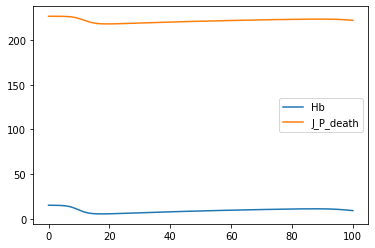

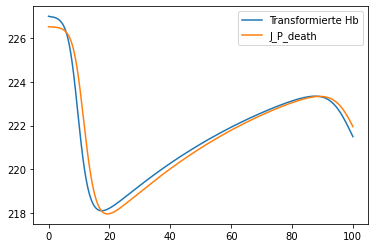

(array([   0.2596864 ,    3.53311736, -122.98044523,  181.04970722]),
 array([[ 1.32295414e+05, -1.79992185e+06,  1.11037587e+06,
         -1.59813993e+07],
        [-1.79992185e+06,  2.44885184e+07, -1.51070224e+07,
          2.17432101e+08],
        [ 1.54394392e+07, -2.10058559e+08,  1.40975566e+10,
          1.76219457e+09],
        [-1.22603364e+07,  1.66805839e+08,  3.52438915e+09,
          2.42301754e+09]]))

In [38]:
from scipy.optimize import curve_fit

# Definieren Sie die Funktion, die die Beziehung zwischen den beiden Spezies beschreibt:
def func(x, a,b, c, d):
    return a * (b*x-c) + d

# Ihre Daten:
x = result['time']
y1 = result['Hb']
y2 = result['J_P_death'] 
#y2 = result['k_P_death'] 

# Zuerst plotte ich die ursprünglichen Daten:
plt.figure()
plt.plot(x, y1, label='Hb')
plt.plot(x, y2, label='J_P_death')
plt.legend()
plt.show()

# Anfangsschätzung für die Parameter (a, b, c, d)
p0 = [1,1,0,0]
# p0 = [0.845673, 1, 0, 213.59784348741212]

# Anwendung von curve_fit
popt, pcov = curve_fit(func, y1, y2, p0)

# Jetzt wende ich die Transformation an:
y1_transformiert = func(y1, *popt)

# Und plotte das Ergebnis:
plt.figure()
plt.plot(x, y1_transformiert, label='Transformierte Hb')
plt.plot(x, y2, label='J_P_death')
plt.legend()
plt.show()

popt, pcov

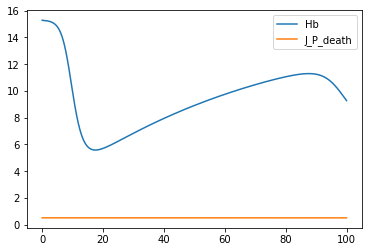

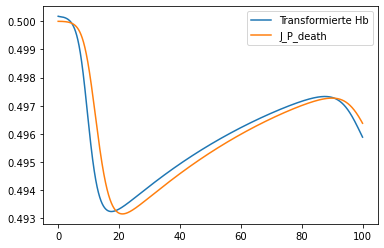

(array([0.00071535, 0.48924947]),
 array([[ 2.95122316e-13, -2.78929874e-12],
        [-2.78929874e-12,  2.80272112e-11]]))

In [39]:
from scipy.optimize import curve_fit

# Definieren Sie die Funktion, die die Beziehung zwischen den beiden Spezies beschreibt:
def func(x, a, d):
    return a * (x) + d

# Ihre Daten:
x = result['time']
y1 = result['Hb']
y2 = result['J_P_death']/ result['P'] 
#y2 = result['k_P_death'] 

# Zuerst plotte ich die ursprünglichen Daten:
plt.figure()
plt.plot(x, y1, label='Hb')
plt.plot(x, y2, label='J_P_death')
plt.legend()
plt.show()

# Anfangsschätzung für die Parameter (a, b, c, d)
p0 = [1,0]
# p0 = [0.845673, 1, 0, 213.59784348741212]

# Anwendung von curve_fit
popt, pcov = curve_fit(func, y1, y2, p0)

# Jetzt wende ich die Transformation an:
y1_transformiert = func(y1, *popt)

# Und plotte das Ergebnis:
plt.figure()
plt.plot(x, y1_transformiert, label='Transformierte Hb')
plt.plot(x, y2, label='J_P_death')
plt.legend()
plt.show()

popt, pcov

In [40]:
#array([  0.8074864 ,   0.97879268,   1.42517862, 215.62095001])

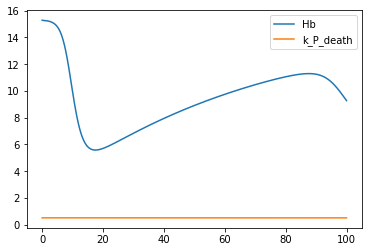

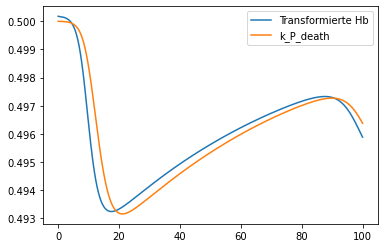

array([-1.22414088e-02, -5.84367006e-02,  1.77709985e+03, -2.12649562e+01])

In [34]:
from scipy.optimize import curve_fit

# Definieren Sie die Funktion, die die Beziehung zwischen den beiden Spezies beschreibt:
def func(x, a,b,c, d):
    return a * (b*x-c) + d

# Ihre Daten:
x = result['time']
y1 = result['Hb']
y2 = result['k_P_death'] 

# Zuerst plotte ich die ursprünglichen Daten:
plt.figure()
plt.plot(x, y1, label='Hb')
plt.plot(x, y2, label='k_P_death')
plt.legend()
plt.show()

# Anfangsschätzung für die Parameter (a, b, c, d)
p0 = [0.85,1,-200,213]
# p0 = [0.845673, 1, 0, 213.59784348741212]

# Anwendung von curve_fit
popt, pcov = curve_fit(func, y1, y2, p0)

# ketzt wende ich die Transformation an:
y1_transformiert = func(y1, *popt)

# Und plotte das Ergebnis:
plt.figure()
plt.plot(x, y1_transformiert, label='Transformierte Hb')
plt.plot(x, y2, label='k_P_death')
plt.legend()
plt.show()

popt